In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [108]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
df.shape

(110527, 14)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [111]:
df.nunique().sort_values()

Gender                 2
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
SMS_received           2
No-show                2
Handcap                5
AppointmentDay        27
Neighbourhood         81
Age                  104
PatientId          62299
ScheduledDay      103549
AppointmentID     110527
dtype: int64

In [112]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

### Renaming the Hipertension and Handcap Columns

In [113]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Univariate Analysis

In [114]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### Removing Age with < 0

In [115]:
n_index = df[df['Age'] < 0].index

In [116]:
df.drop(index=n_index,inplace=True)

In [117]:
df.shape

(110526, 14)

In [118]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [119]:
df['AppointmentDay'].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [120]:
df['AppointmentDay'].tail()

110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object

In [121]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [122]:
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [123]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [124]:
df["Diabetes"].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [125]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [126]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [127]:
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [128]:
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [129]:
df['Hypertension'].unique()

array([1, 0], dtype=int64)

In [130]:
df['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

In [131]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [132]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [133]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [134]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [135]:
df['ScheduledDay'].nunique()

103548

In [136]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [137]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [138]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [139]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

### Creating Age Group Column

In [140]:
df.loc[df['Age'] < 15 ,'Age_group'] = 'Children'
df.loc[((df['Age'] > 14) & (df['Age'] < 25)) ,'Age_group'] = 'Youth'
df.loc[(df['Age'] > 24) & (df['Age'] < 65 ),'Age_group'] = 'Adult'
df.loc[df['Age'] > 64 ,'Age_group'] = 'Aged'

### What gender is likely to miss an appointment?

In [141]:
gender = df[['Gender','No-show']].groupby('No-show')

In [142]:
gender.get_group('Yes')['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

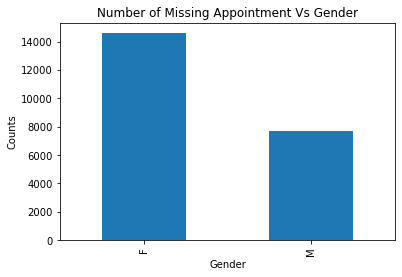

In [143]:
gender.get_group('Yes')['Gender'].value_counts().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Number of Missing Appointment Vs Gender');

### A female is likely to miss an agenda.

### What effect does age group has on absence on both genders?

In [144]:
gender_age = df[['Gender','Age_group','No-show']].groupby('No-show')

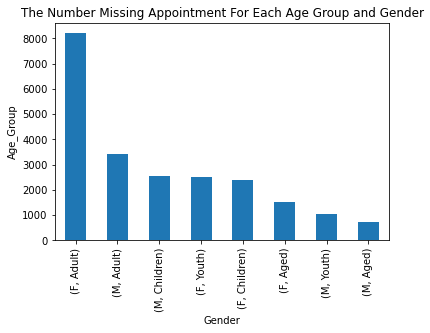

In [145]:
gender_age.get_group('Yes')[['Gender','Age_group']].value_counts().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('Age_Group')
plt.title('The Number Missing Appointment For Each Age Group and Gender');

### An aged is less likely to miss an appointment while more adults miss appointment

### Are scholarship receipents missing more appointment than those not receiving scholarship?

In [146]:
scholarship  = df[['Scholarship','No-show']].groupby('No-show')

In [147]:
scholarship.get_group('Yes')['Scholarship'].value_counts(normalize=True)

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

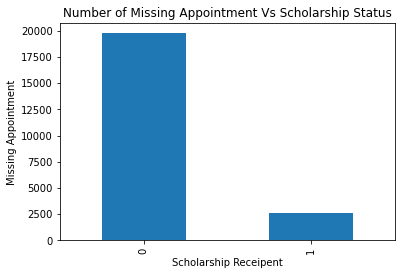

In [148]:
scholarship.get_group('Yes')['Scholarship'].value_counts().plot(kind='bar');
plt.xlabel('Scholarship Receipent')
plt.ylabel('Missing Appointment')
plt.title('Number of Missing Appointment Vs Scholarship Status');

### Scholarship receipent are less likely to miss an appointment

### What criteria is used to select scholarship receipent?

In [149]:
sch_hyp_dia_age = df[['Scholarship','Hypertension','Diabetes','Age_group']].groupby('Scholarship')

In [150]:
sch_hyp_dia_age.get_group(1)[['Hypertension','Diabetes','Age_group']].value_counts()

Hypertension  Diabetes  Age_group
0             0         Adult        4669
                        Children     2409
                        Youth        1699
1             0         Adult        1286
              1         Adult         356
              0         Aged          152
0             1         Adult         129
1             1         Aged           68
0             0         Aged           61
1             0         Youth          11
0             1         Aged           10
1             1         Youth           6
              0         Children        5
dtype: int64

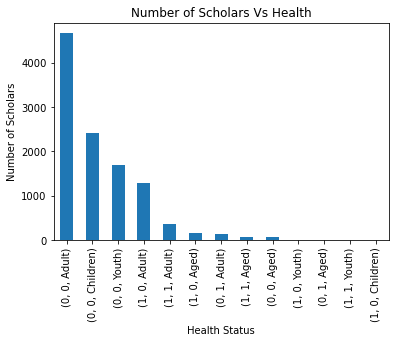

In [151]:
sch_hyp_dia_age.get_group(1)[['Hypertension','Diabetes','Age_group']].value_counts().plot(kind='bar');
plt.xlabel('Health Status')
plt.ylabel('Number of Scholars')
plt.title('Number of Scholars Vs Health');

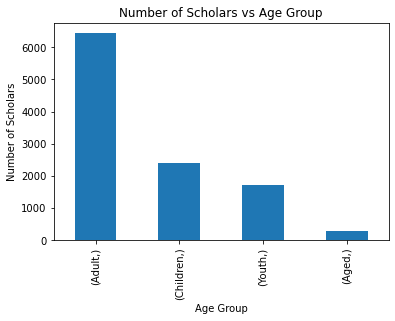

In [152]:
sch_hyp_dia_age.get_group(1)[['Age_group']].value_counts().plot(kind='bar');
plt.xlabel('Age Group')
plt.ylabel('Number of Scholars')
plt.title('Number of Scholars vs Age Group');

### The age group seem to be the most important factor that determine if someone gets the scholarship. From the plot, it can be deduced that Adults are the most populous receipient of the scholarship and the Aged are only given the scholarship if they have either Hypertension or Diabetes or Both.  

### Did hypertensive patients miss more appointment?

In [153]:
hypertension  = df[['Hypertension','No-show']].groupby('Hypertension')

In [154]:
hypertension.get_group(1)['No-show'].value_counts(normalize=True)

No     0.82698
Yes    0.17302
Name: No-show, dtype: float64

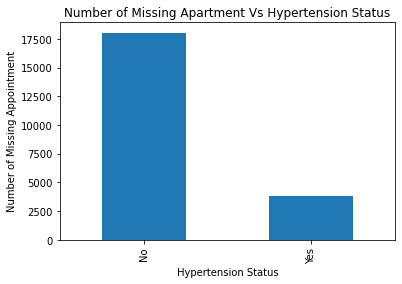

In [155]:
hypertension.get_group(1)['No-show'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Missing Appointment')
plt.title('Number of Missing Apartment Vs Hypertension Status');

###  No, hypertensive patients did not miss a most of the appointment

### What age group has more hypertension?

In [156]:
hyper_age  = df[['Hypertension','Age_group']].groupby('Hypertension')

In [157]:
hyper_age.get_group(1)['Age_group'].value_counts(normalize=True)

Adult       0.603826
Aged        0.391588
Youth       0.003670
Children    0.000917
Name: Age_group, dtype: float64

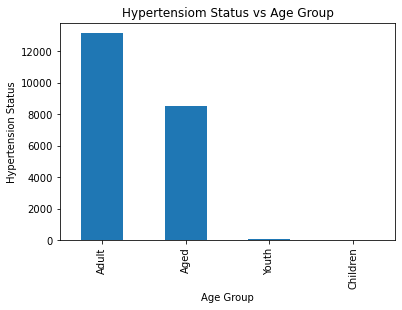

In [158]:
hyper_age.get_group(1)['Age_group'].value_counts().plot(kind='bar');
plt.xlabel('Age Group')
plt.ylabel('Hypertension Status')
plt.title('Hypertensiom Status vs Age Group');

### More than 90% of the hypertensive patients are either an adult and aged

### Did most hypertensive patient have diabetes? 

In [159]:
hyper_dia  = df[['Hypertension','Diabetes']].groupby('Hypertension')

In [160]:
hyper_dia.get_group(1)['Diabetes'].value_counts(normalize=True)

0    0.702491
1    0.297509
Name: Diabetes, dtype: float64

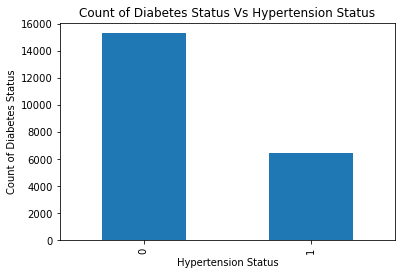

In [161]:
hyper_dia.get_group(1)['Diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Diabetes Status');
plt.title('Count of Diabetes Status Vs Hypertension Status');

### No, a larger percentage of hypertensive patients did not have diabetes

### what percentage of hypertensive patients takes alcohol?

In [162]:
hyper_alc = df[['Hypertension','Alcoholism']].groupby('Hypertension')

In [163]:
hyper_alc.get_group(1)['Alcoholism'].value_counts(normalize=True)

0    0.939131
1    0.060869
Name: Alcoholism, dtype: float64

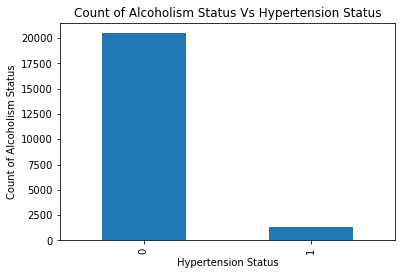

In [164]:
hyper_alc.get_group(1)['Alcoholism'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Alcoholism Status');
plt.title('Count of Alcoholism Status Vs Hypertension Status');

### 6.09 % of Hypertensive patients takes alcohol 

### How many diabetic patients miss their appointment?

In [165]:
diabetes  = df[['Diabetes','No-show']].groupby('Diabetes')

In [166]:
diabetes.get_group(1)['No-show'].value_counts()

No     6513
Yes    1430
Name: No-show, dtype: int64

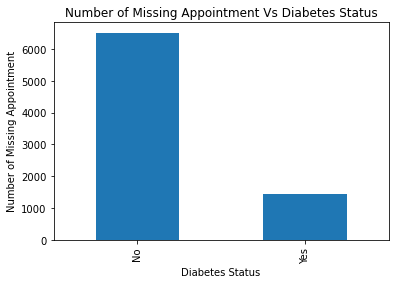

In [167]:
diabetes.get_group(1)['No-show'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Missing Appointment');
plt.title('Number of Missing Appointment Vs Diabetes Status');

### 1430 diabetic patients missed thier appointmen

### What percentage of alcoholics are diabetic?

In [168]:
dia_alc  = df[['Diabetes','Alcoholism']].groupby('Alcoholism')

In [169]:
dia_alc.get_group(1)['Diabetes'].value_counts(normalize=True)

0    0.90119
1    0.09881
Name: Diabetes, dtype: float64

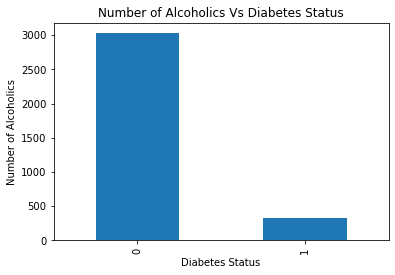

In [170]:
dia_alc.get_group(1)['Diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Alcoholics')
plt.title('Number of Alcoholics Vs Diabetes Status');

### 9.88 % of alcoholics are diabetic

### Did Alcoholics miss more appointment than non-alcoholics?

In [171]:
alcoholism  = df[['Alcoholism','No-show']].groupby('No-show')

In [172]:
alcoholism.get_group('Yes')['Alcoholism'].value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

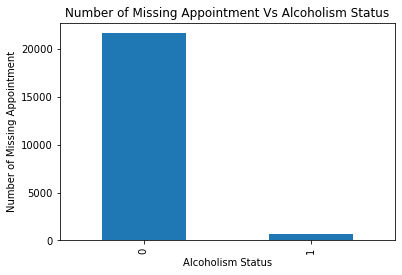

In [173]:
alcoholism.get_group('Yes')['Alcoholism'].value_counts().plot(kind='bar')
plt.xlabel('Alcoholism Status')
plt.ylabel('Number of Missing Appointment')
plt.title('Number of Missing Appointment Vs Alcoholism Status');

### No, there are more Non - alcoholics that missed their appointment than alcoholics

### What was the effect of the sms on patients appointment?

In [174]:
sms = df[['SMS_received','No-show']].groupby('No-show')

In [175]:
sms.get_group('No')['SMS_received'].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [176]:
sms.get_group('Yes')['SMS_received'].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

### The sms decreases the number of patients that missed thier meeting.

### What is the percentage of missing appointments for each handicap?

In [177]:
handicap = df[['Handicap','No-show']].groupby('No-show')

In [178]:
handicap.get_group('No')['Handicap'].value_counts(normalize=True)

0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: Handicap, dtype: float64

In [179]:
handicap.get_group('Yes')['Handicap'].value_counts(normalize=True)

0    0.981764
1    0.016399
2    0.001658
3    0.000134
4    0.000045
Name: Handicap, dtype: float64

### What age group are the most diabetic?

In [180]:
age_diabetes = df[['Age_group','Diabetes']].groupby('Diabetes')

In [181]:
age_diabetes.get_group(1)['Age_group'].value_counts(normalize=True)

Adult       0.565152
Aged        0.423392
Youth       0.009065
Children    0.002392
Name: Age_group, dtype: float64

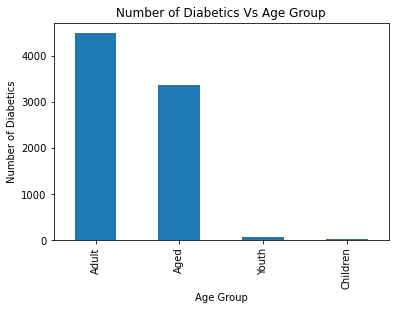

In [182]:
age_diabetes.get_group(1)['Age_group'].value_counts().plot(kind='bar');
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetics')
plt.title('Number of Diabetics Vs Age Group');

### Most diabetics patients are either adults or aged

### What Gender and Age Group Are More Likely to Have Diabetes

In [183]:
gender_diabetes = df[['Gender','Diabetes']].groupby('Diabetes')

In [184]:
gender_diabetes.get_group(1)['Gender'].value_counts()

F    5606
M    2337
Name: Gender, dtype: int64

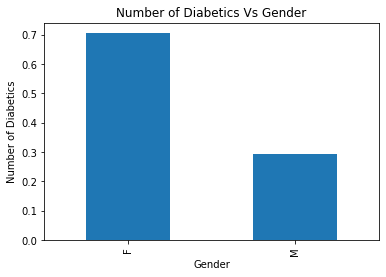

In [185]:
gender_diabetes.get_group(1)['Gender'].value_counts(normalize=True).plot(kind = 'bar');
plt.xlabel('Gender')
plt.ylabel('Number of Diabetics')
plt.title('Number of Diabetics Vs Gender');

In [186]:
age_dia_gen = df[['Age_group','Diabetes','Gender']].groupby('Diabetes')

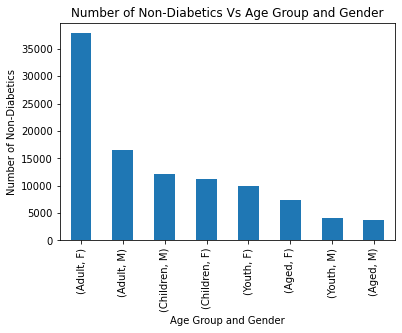

In [187]:
age_dia_gen.get_group(0)[['Age_group','Gender']].value_counts().plot(kind='bar');
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Non-Diabetics')
plt.title('Number of Non-Diabetics Vs Age Group and Gender');

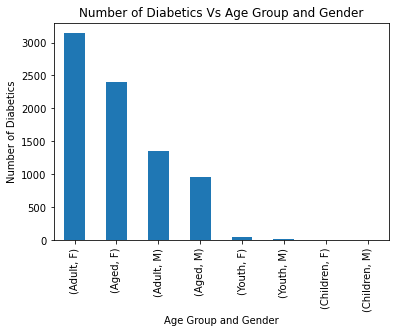

In [188]:
age_dia_gen.get_group(1)[['Age_group','Gender']].value_counts().plot(kind='bar');
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Diabetics')
plt.title('Number of Diabetics Vs Age Group and Gender');

### Conclusion : Most diabetic patients are above 24(Youth age) and are mostly females

### Does taking alcohol causes diabetes? 

In [189]:
diabetes_alcohol = df[['Diabetes','Alcoholism']].groupby('Alcoholism')

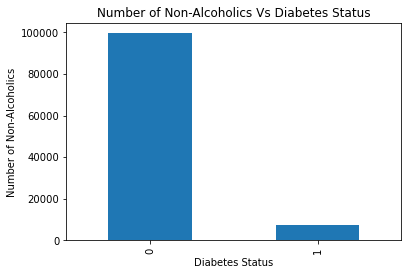

In [190]:
diabetes_alcohol.get_group(0)['Diabetes'].value_counts().plot(kind='bar');
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Non-Alcoholics')
plt.title('Number of Non-Alcoholics Vs Diabetes Status');

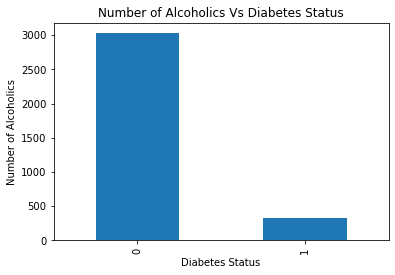

In [191]:
diabetes_alcohol.get_group(1)['Diabetes'].value_counts().plot(kind='bar');
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Alcoholics')
plt.title('Number of Alcoholics Vs Diabetes Status');

### Taking alcohol does not lead to diabetes

### Does taking alcohol lead to hypertension?

In [192]:
hyper_alcohol = df[['Hypertension','Alcoholism']].groupby('Alcoholism')

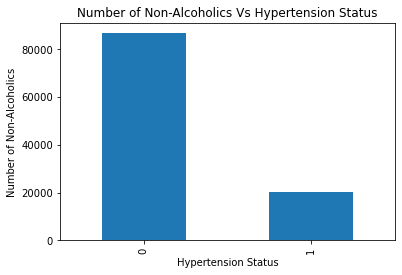

In [193]:
hyper_alcohol.get_group(0)['Hypertension'].value_counts().plot(kind='bar');
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Non-Alcoholics')
plt.title('Number of Non-Alcoholics Vs Hypertension Status');

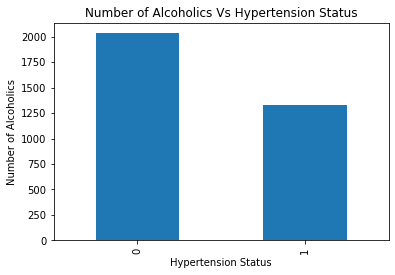

In [194]:
hyper_alcohol.get_group(1)['Hypertension'].value_counts().plot(kind='bar');
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Alcoholics')
plt.title('Number of Alcoholics Vs Hypertension Status');

### Taking Alcohol increases the chances of having hypertension

### Are patients with hypertension and diabetes likely to miss an appointment?

In [195]:
hyper_dia_miss = df[['Hypertension','Diabetes','No-show']].groupby('No-show')

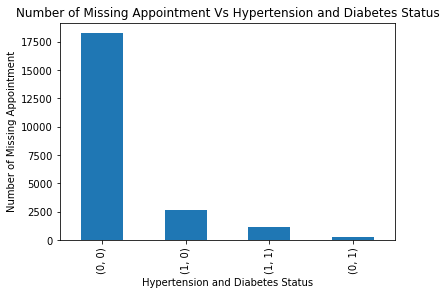

In [196]:
hyper_dia_miss.get_group('Yes')[['Hypertension','Diabetes']].value_counts().plot(kind='bar');
plt.xlabel('Hypertension and Diabetes Status')
plt.ylabel('Number of Missing Appointment')
plt.title('Number of Missing Appointment Vs Hypertension and Diabetes Status');

### Patients suffering from hypertension and diabetes does not determine the patients availability for an appointment

### Top Ten Neighbourhood That Miss Their Appointments

In [197]:
Neigh_Nos = df[['No-show','Neighbourhood']].groupby('No-show')

In [198]:
Neigh_Nos.get_group('Yes')['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

In [199]:
Neigh_Nos.get_group('No')['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

### From the analysis above it can be deduced that more people in each neighbourhood missed their appointments.

### What Neighbourhoods are the most populous?

In [200]:
df['Neighbourhood'].value_counts(normalize=True)

JARDIM CAMBURI                 0.069821
MARIA ORTIZ                    0.052522
RESISTÊNCIA                    0.040090
JARDIM DA PENHA                0.035078
ITARARÉ                        0.031793
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64

In [201]:
df['Neighbourhood'].value_counts().head(15)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
Name: Neighbourhood, dtype: int64

In [202]:
df['Neighbourhood'].value_counts().tail(15)

ANTÔNIO HONÓRIO                271
FRADINHOS                      258
ENSEADA DO SUÁ                 235
SANTA HELENA                   178
HORTO                          175
UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64

### Which Neighbourhood has the highest number of Alcoholics?

In [203]:
neigh_alcohol = df[['Alcoholism','Neighbourhood']].groupby('Alcoholism')

In [204]:
neigh_alcohol.get_group(1)['Neighbourhood'].value_counts().head(1)

SANTA MARTHA    344
Name: Neighbourhood, dtype: int64

### Santa Martha has the highest number of Alcoholics

In [205]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No_Show_Appointment.ipynb'])

1